In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
from utils import *
import glob

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Greens_r'))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Introduction

The figures below show the returned data sizes for each map task per experiment (upper three figures) and the Data communication times for each map task - shuffle times - per experiment (lower three figures).

Cell No. 2 has the results from approach 1 of the Spark implementation. Approach 1 broadcasts the whole system to all workers. It also partitions the system in equal parts, finds the graph edges and returns them.

Cell No. 3 has the resutls from approach 2 of the Spark implementation. Approach 2 partitions the data, creates all the permutations between the partitions, finds the graph edges per permutation and then it returns them.

Cell No. 4 has the results from approach 3 of the Spark implementation. Approach 3 partitions the data, creates all the permutations between the partitions, find the connected components per subgraph and then merges those components that have at least one common node.

Text(0.5,0.98,u'Data Communication time for all datasets, per experiment (Cores used)')

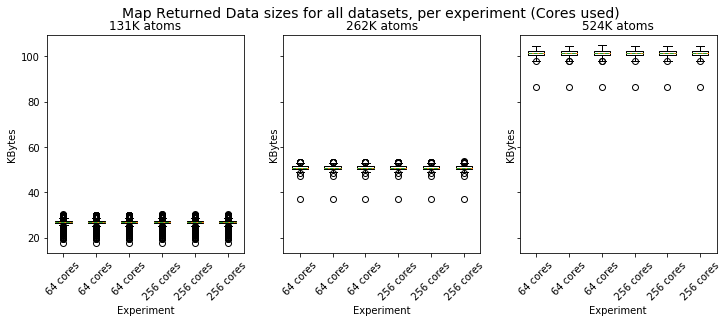

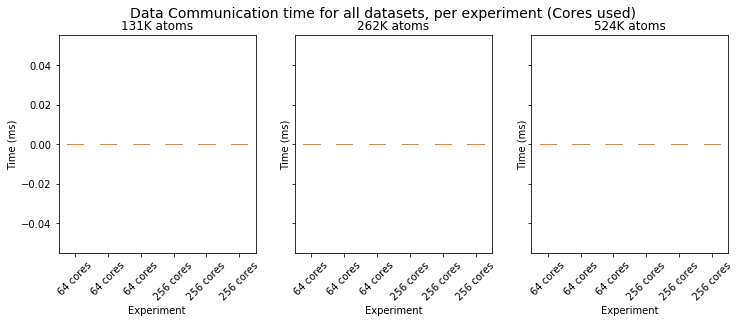

In [2]:
fig1,axes1 = plt.subplots(nrows=1, ncols=3,sharey=True)
fig1.set_size_inches(12,4)
fig2,axes2 = plt.subplots(nrows=1, ncols=3,sharey=True)
fig2.set_size_inches(12,4)
atoms=[131,262,524]
meanlineprops = dict(linestyle='--')
upperLabels=['64 cores','64 cores','64 cores','256 cores','256 cores','256 cores']

for i in range(3):
    apps = glob.glob('Spark/Wrangler/AppData/*Br*%d*/*/app*'%atoms[i])
    spark_dfs=dict()
    for app in apps:
        filename = app.split('unit.000000/')[1]
        session = app.split('unit.000000/')[0].split('/')[-2]
        path = app.split('unit.000000/')[0]+'unit.000000/'
        spark_dfs[session]= SparkLogToDataFrame(path=path,filename=filename)
    Df_list1=list()
    Df_list2=list()
    sessions = ['WraSpBrAlO_%dKn_64_1024_1'%atoms[i],
                'WraSpBrAlO_%dKn_64_1024_2'%atoms[i],
                'WraSpBrAlO_%dKn_64_1024_3'%atoms[i],
                'WraSpBrAlO_%dKn_256_1024_1'%atoms[i],
                'WraSpBrAlO_%dKn_256_1024_2'%atoms[i],
                'WraSpBrAlO_%dKn_256_1024_3'%atoms[i]]
    for session in sessions:
        temp1 = spark_dfs[session]['ResultSize'].values/1024.0
        temp2 = spark_dfs[session]['GettingResultTime'].values
        Df_list1.append(temp1)
        Df_list2.append(temp2)
    axes1[i].boxplot(Df_list1,meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=True,meanprops=meanlineprops)
    axes1[i].set_xlabel('Experiment')
    axes1[i].set_ylabel('KBytes')
    axes1[i].set_title('%dK atoms'%atoms[i])
    axes1[i].set_xticklabels(upperLabels,rotation=45)
    axes2[i].boxplot(Df_list2)
    axes2[i].set_xlabel('Experiment')
    axes2[i].set_ylabel('Time (ms)')
    axes2[i].set_title('%dK atoms'%atoms[i])
    axes2[i].set_xticklabels(upperLabels,rotation=45)
fig1.suptitle('Map Returned Data sizes for all datasets, per experiment (Cores used)',fontsize=14)
fig2.suptitle('Data Communication time for all datasets, per experiment (Cores used)',fontsize=14)

In [3]:
a = np.array(0,)
for sizes in Df_list1:
    a = np.hstack([a,sizes])
#fig1,axes1 = plt.subplots(nrows=1, ncols=1)
#fig1.set_size_inches(6,12)
#axes1.hist(a,bins=100)
#axes1.set_title('Returned Data size per task histogram for the 524K case Approach 1. Mean = %f, Std = %f'%(a.mean(),a.std()))
#axes1.set_ylabel('Tasks')
#axes1.set_xlabel('Returned data size in KB')
print 'Returned Data size per task histogram for the 524K case Approach 1. Mean = %f, Std = %f'%(a.mean(),a.std())

Returned Data size per task histogram for the 524K case Approach 1. Mean = 101.463292, Std = 1.939869


Text(0.5,0.98,u'Data Communication time for all datasets, per experiment (Cores used)')

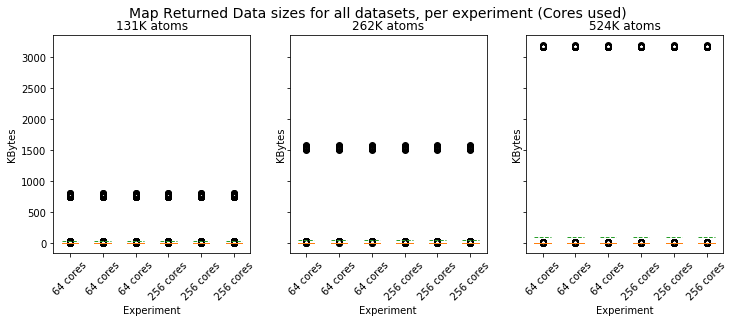

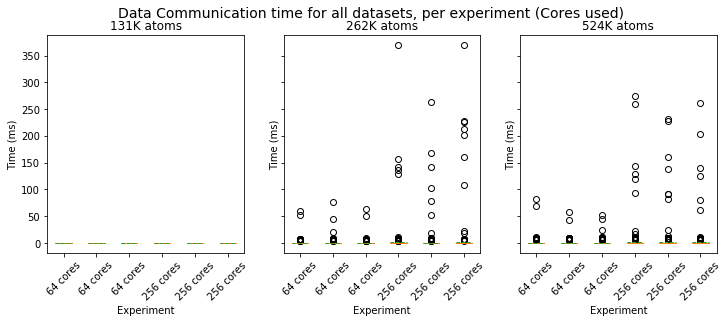

In [4]:
fig1,axes1 = plt.subplots(nrows=1, ncols=3,sharey=True)
fig1.set_size_inches(12,4)
fig2,axes2 = plt.subplots(nrows=1, ncols=3,sharey=True)
fig2.set_size_inches(12,4)
atoms=[131,262,524]
meanlineprops = dict(linestyle='--')
upperLabels=['64 cores','64 cores','64 cores','256 cores','256 cores','256 cores']

for i in range(3):
    apps = glob.glob('Spark/Wrangler/AppData/*Col*%d*/unit.000000/app*'%atoms[i])
    spark_dfs=dict()
    for app in apps:
        filename = app.split('unit.000000/')[1]
        session = app.split('unit.000000/')[0].split('/')[-2]
        path = app.split('unit.000000/')[0]+'unit.000000/'
        spark_dfs[session]= SparkLogToDataFrame(path=path,filename=filename)
    Df_list1=list()
    Df_list2=list()
    sessions = ['WraSpColAlO_%dKn_64_1024_1'%atoms[i],
                'WraSpColAlO_%dKn_64_1024_2'%atoms[i],
                'WraSpColAlO_%dKn_64_1024_3'%atoms[i],
                'WraSpColAlO_%dKn_256_1024_1'%atoms[i],
                'WraSpColAlO_%dKn_256_1024_2'%atoms[i],
                'WraSpColAlO_%dKn_256_1024_3'%atoms[i]]
    for session in sessions:
        temp1 = spark_dfs[session]['ResultSize'].values/1024.0
        temp2 = spark_dfs[session]['GettingResultTime'].values
        Df_list1.append(temp1)
        Df_list2.append(temp2)
    axes1[i].boxplot(Df_list1,meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=True,meanprops=meanlineprops,)
    axes1[i].set_xlabel('Experiment')
    axes1[i].set_ylabel('KBytes')
    axes1[i].set_title('%dK atoms'%atoms[i])
    axes1[i].set_xticklabels(upperLabels,rotation=45)
    axes2[i].boxplot(Df_list2,meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=True,meanprops=meanlineprops,)
    axes2[i].set_xlabel('Experiment')
    axes2[i].set_ylabel('Time (ms)')
    axes2[i].set_title('%dK atoms'%atoms[i])
    axes2[i].set_xticklabels(upperLabels,rotation=45)
fig1.suptitle('Map Returned Data sizes for all datasets, per experiment (Cores used)',fontsize=14)
fig2.suptitle('Data Communication time for all datasets, per experiment (Cores used)',fontsize=14)

In [5]:
a = np.array(0,)
b = np.array(0,)
for sizes in Df_list1:
    a = np.hstack([a,sizes])
for time in Df_list2:
    b = np.hstack([b,time])
#fig1,axes1 = plt.subplots(nrows=1, ncols=2)
#fig1.set_size_inches(12,12)
#axes1[0].hist(a,bins=100)
#axes1[0].set_title('Returned Data size per task histogram for the 524K case Approach 2. Mean = %f, Std = %f'%(a.mean(),a.std()))
#axes1[0].set_ylabel('Tasks')
#axes1[0].set_xlabel('Returned data size in KB')
#axes1[1].hist(b,bins=100)
#axes1[1].set_title('Returned Data transfer times per task histogram for the 524K case Approach 2. Mean = %f, Std = %f'%(b.mean(),b.std()))
#axes1[1].set_ylabel('Tasks')
#axes1[1].set_xlabel('Returned Data transfer times in msec')
print 'Returned Data size per task histogram for the 524K case Approach 2. Mean = %f, Std = %f'%(a.mean(),a.std())
print 'Returned Data transfer times per task histogram for the 524K case Approach 2. Mean = %f, Std = %f'%(b.mean(),b.std())

Returned Data size per task histogram for the 524K case Approach 2. Mean = 101.469570, Std = 551.491366
Returned Data transfer times per task histogram for the 524K case Approach 2. Mean = 0.752156, Std = 9.564985


Text(0.5,0.98,u'Data Communication time for all datasets, per experiment (Cores used)')

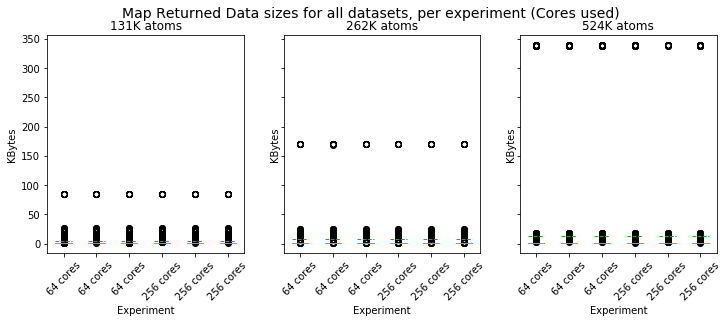

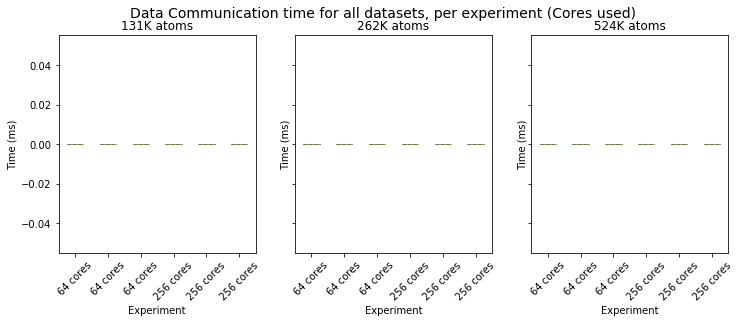

In [6]:
fig1,axes1 = plt.subplots(nrows=1, ncols=3,sharey=True)
fig1.set_size_inches(12,4)
fig2,axes2 = plt.subplots(nrows=1, ncols=3,sharey=True)
fig2.set_size_inches(12,4)
atoms=[131,262,524]
meanlineprops = dict(linestyle='--')
upperLabels=['64 cores','64 cores','64 cores','256 cores','256 cores','256 cores']

for i in range(3):
    apps = glob.glob('Spark/Wrangler/AppData/*cc*%d*/unit.000000/app*'%atoms[i])
    spark_dfs=dict()
    for app in apps:
        filename = app.split('unit.000000/')[1]
        session = app.split('unit.000000/')[0].split('/')[-2]
        path = app.split('unit.000000/')[0]+'unit.000000/'
        spark_dfs[session]= SparkLogToDataFrame(path=path,filename=filename)
    Df_list1=list()
    Df_list2=list()
    sessions = ['WraSpPccAlO_%dKn_64_1024_1'%atoms[i],
                'WraSpPccAlO_%dKn_64_1024_2'%atoms[i],
                'WraSpPccAlO_%dKn_64_1024_3'%atoms[i],
                'WraSpPccAlO_%dKn_256_1024_1'%atoms[i],
                'WraSpPccAlO_%dKn_256_1024_2'%atoms[i],
                'WraSpPccAlO_%dKn_256_1024_3'%atoms[i]]
    for session in sessions:
        temp1 = spark_dfs[session]['ResultSize'].values/1024.0
        temp2 = spark_dfs[session]['GettingResultTime'].values
        Df_list1.append(temp1)
        Df_list2.append(temp2)
    axes1[i].boxplot(Df_list1,meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=True,meanprops=meanlineprops,)
    axes1[i].set_xlabel('Experiment')
    axes1[i].set_ylabel('KBytes')
    axes1[i].set_title('%dK atoms'%atoms[i])
    axes1[i].set_xticklabels(upperLabels,rotation=45)
    axes2[i].boxplot(Df_list2,meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=True,meanprops=meanlineprops,)
    axes2[i].set_xlabel('Experiment')
    axes2[i].set_ylabel('Time (ms)')
    axes2[i].set_title('%dK atoms'%atoms[i])
    axes2[i].set_xticklabels(upperLabels,rotation=45)
fig1.suptitle('Map Returned Data sizes for all datasets, per experiment (Cores used)',fontsize=14)
fig2.suptitle('Data Communication time for all datasets, per experiment (Cores used)',fontsize=14)

In [7]:
a = np.array(0,)
for sizes in Df_list1:
    a = np.hstack([a,sizes])
#fig1,axes1 = plt.subplots(nrows=1, ncols=1)
#fig1.set_size_inches(6,12)
#axes1.hist(a,bins=100)
#axes1.set_title('Returned Data size per task histogram for the 524K case Approach 1. Mean = %f, Std = %f'%(a.mean(),a.std()))
#axes1.set_ylabel('Tasks')
#axes1.set_xlabel('Returned data size in KB')
print 'Returned Data size per task histogram for the 524K case Approach 1. Mean = %f, Std = %f'%(a.mean(),a.std())

Returned Data size per task histogram for the 524K case Approach 1. Mean = 12.626541, Std = 58.581793


# Take home messages

Spark's communication layer is extremely efficient. As we can see from the results for any communication that is below one MB Spark registers time 0 ms, which allows us to assume that it is in the region of μsecs. This is expected because the nodes of Wrangler are connected with a 1Gbps ethernet connection.


# RADICAL-Pilot Write/Read Times

In [8]:
folders = glob.glob('Vanilla/Wrangler/rc/WraRPdalO 2/*524*')
write_times = list()
read_times = list()
for folder in folders:
    unitsF = glob.glob(folders[0]+'/pilot.0000/unit.*')
    for unit in unitsF:
        if '000000' in unit:
            continue
        elif '001025' in unit:
            stdout = open(unit+'/STDOUT')
            times_line = stdout.readline()
            stdout.close()
            read_time = float(times_line.split(',')[0])
            read_times.append(read_time)
        else:
            stdout = open(unit+'/STDOUT')
            times_line = stdout.readline()
            stdout.close()
            write_time = float(times_line.split(',')[-1])
            write_times.append(write_time)
        

In [9]:
print np.mean(write_times)
print np.mean(read_times)

0.00673581152344
19.594035


In [10]:
folders = glob.glob('Vanilla/Comet/Session/*524*')
write_times = list()
read_times = list()
for folder in folders:
    unitsF = glob.glob(folders[0]+'/pilot.0000/unit.*')
    for unit in unitsF:
        if '000000' in unit:
            continue
        elif '001025' in unit:
            stdout = open(unit+'/STDOUT')
            times_line = stdout.readline()
            stdout.close()
            read_time = float(times_line.split(',')[0])
            read_times.append(read_time)
        else:
            stdout = open(unit+'/STDOUT')
            times_line = stdout.readline()
            stdout.close()
            write_time = float(times_line.split(',')[-1])
            write_times.append(write_time)

print np.mean(write_times)
print np.mean(read_times)

0.00468207617188
18.968195
